In [1]:
import numpy as np
import math
from matplotlib import pyplot

In [51]:
rho=20
E=150e9
vol_ab=20
vol_bc=15
I_ab=0.002
I_bc=0.0015
M_motor=400
m_ab=200
L_ab=2
L_bc=4.6
L_total=L_ab+L_bc
print(E)

150000000000.0


In [52]:
def construct_M_K(L):
    M_origine=np.empty((4,4))
    K_origine=np.empty((4,4))
    M_origine=np.array([[156,22*L,54,-13*L],
                       [22*L,4*L**2,13*L,-3*L**2],
                       [54,13*L,156,-22*L],
                       [-13*L,-3*L**2,-22*L,4*L**2]])
    K_origine=np.array([[12,6*L,-12,6*L],
                       [6*L,4*L**2,-6*L,2*L**2],
                       [-12,-6*L,12,-6*L],
                       [6*L,2*L**2,-6*L,4*L**2]])
    return M_origine,K_origine

M_origine_ab,K_origine_ab=construct_M_K(L_ab)
print(M_origine_ab)

[[156  44  54 -26]
 [ 44  16  26 -12]
 [ 54  26 156 -44]
 [-26 -12 -44  16]]


In [53]:
###sur AB
M_origine_ab,K_origine_ab=construct_M_K(L_ab)
print(M_origine_ab)
M_ab=np.zeros((4,4))
M_ab[2][2]=M_origine_ab[2][2]+(420/m_ab)*M_motor
M_ab[2][3]=M_origine_ab[2][3]
M_ab[3][2]=M_origine_ab[3][2]
M_ab[3][3]=M_origine_ab[3][3]

K_ab=np.zeros((4,4))
K_ab[2][2]=K_origine_ab[2][2]
K_ab[2][3]=K_origine_ab[2][3]
K_ab[3][2]=K_origine_ab[3][2]
K_ab[3][3]=K_origine_ab[3][3]

###sur BC
M_bc,K_bc=construct_M_K(L_bc)

[[156  44  54 -26]
 [ 44  16  26 -12]
 [ 54  26 156 -44]
 [-26 -12 -44  16]]


In [54]:
####Final
M_final=((rho*vol_ab)/420)*M_ab+((rho*vol_bc)/420)*M_bc
K_final=((E*I_ab)/(L_ab**3))*K_ab+((E*I_bc)/(L_bc**3))*K_bc
print(K_final)

[[ 2.77389661e+07  6.37996219e+07 -2.77389661e+07  6.37996219e+07]
 [ 6.37996219e+07  1.95652174e+08 -6.37996219e+07  9.78260870e+07]
 [-2.77389661e+07 -6.37996219e+07  4.77738966e+08 -5.13799622e+08]
 [ 6.37996219e+07  9.78260870e+07 -5.13799622e+08  7.95652174e+08]]


[40945440.67652688  5485821.97875734    49915.46337044   172014.55051774]
[[ 0.34399308 -0.56797999 -0.94540266 -0.77180412]
 [-0.81604543  0.78079469  0.27358931  0.1745121 ]
 [-0.02339285 -0.02361374  0.12567575 -0.53697613]
 [-0.46388725 -0.25923111  0.12477299 -0.29243899]]
[[-0.56797999]
 [ 0.78079469]
 [-0.02361374]
 [-0.25923111]]


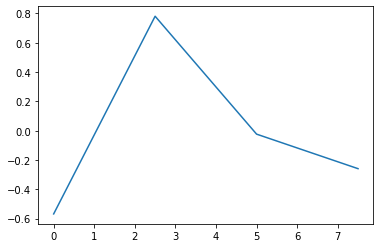

In [55]:
val_propre,vecteur_propre=np.linalg.eig(np.linalg.inv(M_final).dot(K_final))
VP=np.sort(np.diag(vecteur_propre))
omega=np.sqrt(VP[3])
k=np.where(np.diag(vecteur_propre)==VP[3])
U=vecteur_propre[:,k[0]]
l=10/4
R=np.arange(0,10,l)
pyplot.plot(R,U)
print(val_propre)
print(vecteur_propre)
print(U)

## 

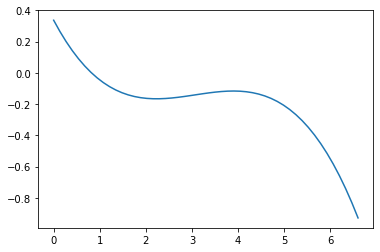

In [60]:
###Mode 1
s=np.sum(np.abs(vecteur_propre),axis=0)
A1=1
phi1=0
L=L_total
x=np.linspace(0,6.6)
func_phi1=1-(3*(x**2)/(L**2))+(2*(x**3)/(L**3))
func_phi2=x-(2*(x**2)/L)+((x**3)/(L**2))
func_phi3=(3*(x**2)/(L**2))-(2*(x**3)/(L**3))
func_phi4=((-x**2)/L)+((x**3)/(L**2))
t=1
v=(func_phi1*vecteur_propre[0][0]+func_phi2*vecteur_propre[0][1]+func_phi3*vecteur_propre[0][2]+func_phi4*vecteur_propre[0][3])*A1*math.sin((val_propre[0]*t)+phi1)
pyplot.plot(x,v)

[[ 0.34399308 -0.56797999 -0.94540266 -0.77180412]
 [-0.81604543  0.78079469  0.27358931  0.1745121 ]
 [-0.02339285 -0.02361374  0.12567575 -0.53697613]
 [-0.46388725 -0.25923111  0.12477299 -0.29243899]]
[-0.81604543  0.78079469  0.27358931  0.1745121 ]
0.7807946924500524


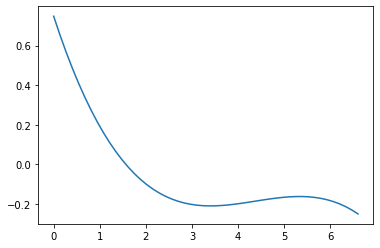

In [61]:
print(vecteur_propre)
print(vecteur_propre[1])
print(vecteur_propre[1][1])
v=(func_phi1*vecteur_propre[1][0]+func_phi2*vecteur_propre[1][1]+func_phi3*vecteur_propre[1][2]+func_phi4*vecteur_propre[1][3])*A1*math.sin((val_propre[1]*t)+phi1)
pyplot.plot(x,v)

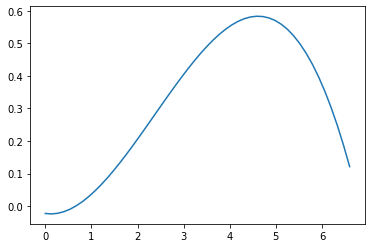

In [62]:
v=(func_phi1*vecteur_propre[2][0]+func_phi2*vecteur_propre[2][1]+func_phi3*vecteur_propre[2][2]+func_phi4*vecteur_propre[2][3])*A1*math.sin(val_propre[2]+phi1)
pyplot.plot(x,v)

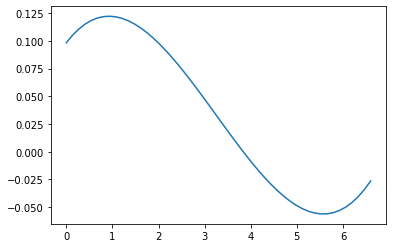

In [63]:
v=(func_phi1*vecteur_propre[3][0]+func_phi2*vecteur_propre[3][1]+func_phi3*vecteur_propre[3][2]+func_phi4*vecteur_propre[3][3])*A1*math.sin(val_propre[3]+phi1)
pyplot.plot(x,v)